# Importing Libraries 

In [43]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Load Datasets

In [46]:

# Load dataset
df = pd.read_csv('Paitients_Files_Train.csv')
df


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


# Viewing Dataset

In [49]:
# View the first 5 rows
print("First 5 rows:")
print(df.head())

# View the last 5 rows
print("\nLast 5 rows:")
print(df.tail())

# Optionally view a random sample of rows
print("\nRandom sample of 5 rows:")
print(df.sample(5))
df


First 5 rows:
          ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0  ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
1  ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
2  ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
3  ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
4  ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive

Last 5 rows:
            ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
594  ICU200604    6  123  72  45  230  33.6  0.733   34          0  Negative
595  ICU200605    0  188  82  14  185  32.0  0.682   22          1  Positive
596  ICU200606    0   67  76   0    0  45.3  0.194   46          1  Negative
597  ICU200607    1   89  24  19   25  27.8  0.559   21          0  Negative
598  ICU200608    1  173  74   0    0  36.8  0.088   38          1  Positive

Random sample of 5 rows:
            ID  PRG   PL  PR  SK  

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


In [51]:
# Print the shape of the DataFrame (rows, columns)
print("\nData Shape:", df.shape)

# Print data types of each column
print("\nData Types:")
print(df.dtypes)
df



Data Shape: (599, 11)

Data Types:
ID            object
PRG            int64
PL             int64
PR             int64
SK             int64
TS             int64
M11          float64
BD2          float64
Age            int64
Insurance      int64
Sepssis       object
dtype: object


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


In [53]:
# For numerical columns
print("\nSummary Statistics for Numerical Features:")
print(df.describe())

# For non-numerical columns (if any)
print("\nSummary for Object/Categorical Features:")
print(df.describe(include=['object']))
df



Summary Statistics for Numerical Features:
              PRG          PL          PR          SK          TS         M11  \
count  599.000000  599.000000  599.000000  599.000000  599.000000  599.000000   
mean     3.824708  120.153589   68.732888   20.562604   79.460768   31.920033   
std      3.362839   32.682364   19.335675   16.017622  116.576176    8.008227   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   64.000000    0.000000    0.000000   27.100000   
50%      3.000000  116.000000   70.000000   23.000000   36.000000   32.000000   
75%      6.000000  140.000000   80.000000   32.000000  123.500000   36.550000   
max     17.000000  198.000000  122.000000   99.000000  846.000000   67.100000   

              BD2         Age   Insurance  
count  599.000000  599.000000  599.000000  
mean     0.481187   33.290484    0.686144  
std      0.337552   11.828446    0.464447  
min      0.078000   21.000000    0.000000  
25%   

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


# Handeling Zeroes

In [56]:


# Define the columns where zeros are invalid (i.e., represent missing measurements)
cols_with_invalid_zeros = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2']

# Replace zeros with NaN for these columns
for col in cols_with_invalid_zeros:
    df.loc[df[col] == 0, col] = np.nan

# Verify the update by checking the summary statistics again for these columns
print(df[cols_with_invalid_zeros].describe())
df

              PRG          PL          PR          SK          TS         M11  \
count  506.000000  594.000000  571.000000  424.000000  310.000000  590.000000   
mean     4.527668  121.164983   72.103327   29.049528  153.538710   32.406949   
std      3.194089   30.893218   12.197850   10.750992  122.023594    7.021781   
min      1.000000   44.000000   24.000000    7.000000   14.000000   18.200000   
25%      2.000000   99.000000   64.000000   21.000000   74.000000   27.325000   
50%      4.000000  116.500000   72.000000   29.000000  120.000000   32.000000   
75%      7.000000  140.750000   80.000000   36.000000  190.000000   36.600000   
max     17.000000  198.000000  122.000000   99.000000  846.000000   67.100000   

              BD2  
count  599.000000  
mean     0.481187  
std      0.337552  
min      0.078000  
25%      0.248000  
50%      0.383000  
75%      0.647000  
max      2.420000  


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,0,Positive
1,ICU200011,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0,Negative
2,ICU200012,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1,Positive
3,ICU200013,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,1,Negative
4,ICU200014,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6.0,123.0,72.0,45.0,230.0,33.6,0.733,34,0,Negative
595,ICU200605,NaN,188.0,82.0,14.0,185.0,32.0,0.682,22,1,Positive
596,ICU200606,NaN,67.0,76.0,NaN,NaN,45.3,0.194,46,1,Negative
597,ICU200607,1.0,89.0,24.0,19.0,25.0,27.8,0.559,21,0,Negative


In [58]:
# Check for missing values in each column
missing_counts = df.isnull().sum()
print("Missing values per column after replacing zeros with NaN:")
print(missing_counts)


Missing values per column after replacing zeros with NaN:
ID             0
PRG           93
PL             5
PR            28
SK           175
TS           289
M11            9
BD2            0
Age            0
Insurance      0
Sepssis        0
dtype: int64


# Median Imputation

In [61]:
from sklearn.impute import SimpleImputer

# List of columns to impute (those that had invalid zeros replaced with NaN)
cols_to_impute = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11']

# Initialize the imputer with median strategy
imputer = SimpleImputer(strategy='median')

# Apply the imputer on the specified columns
df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])

# Verify that missing values are now imputed
missing_after_imputation = df[cols_to_impute].isnull().sum()
print("Missing values after imputation:")
print(missing_after_imputation)

# Optionally, review summary statistics again
print("\nUpdated summary statistics for imputed columns:")
print(df[cols_to_impute].describe())
df

Missing values after imputation:
PRG    0
PL     0
PR     0
SK     0
TS     0
M11    0
dtype: int64

Updated summary statistics for imputed columns:
              PRG          PL          PR          SK          TS         M11
count  599.000000  599.000000  599.000000  599.000000  599.000000  599.000000
mean     4.445743  121.126043   72.098497   29.035058  137.357262   32.400835
std      2.941454   30.766728   11.908878    9.042104   89.304012    6.968917
min      1.000000   44.000000   24.000000    7.000000   14.000000   18.200000
25%      2.000000   99.000000   64.000000   25.000000  115.000000   27.400000
50%      4.000000  116.500000   72.000000   29.000000  120.000000   32.000000
75%      6.000000  140.000000   80.000000   32.000000  123.500000   36.550000
max     17.000000  198.000000  122.000000   99.000000  846.000000   67.100000


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6.0,148.0,72.0,35.0,120.0,33.6,0.627,50,0,Positive
1,ICU200011,1.0,85.0,66.0,29.0,120.0,26.6,0.351,31,0,Negative
2,ICU200012,8.0,183.0,64.0,29.0,120.0,23.3,0.672,32,1,Positive
3,ICU200013,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,1,Negative
4,ICU200014,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6.0,123.0,72.0,45.0,230.0,33.6,0.733,34,0,Negative
595,ICU200605,4.0,188.0,82.0,14.0,185.0,32.0,0.682,22,1,Positive
596,ICU200606,4.0,67.0,76.0,29.0,120.0,45.3,0.194,46,1,Negative
597,ICU200607,1.0,89.0,24.0,19.0,25.0,27.8,0.559,21,0,Negative


# Checking For Duplicates

In [64]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates removed.")

Number of duplicate rows: 0


# Exploratory Data Analysis: Box Plot, Histogram, Correlation Heatmap

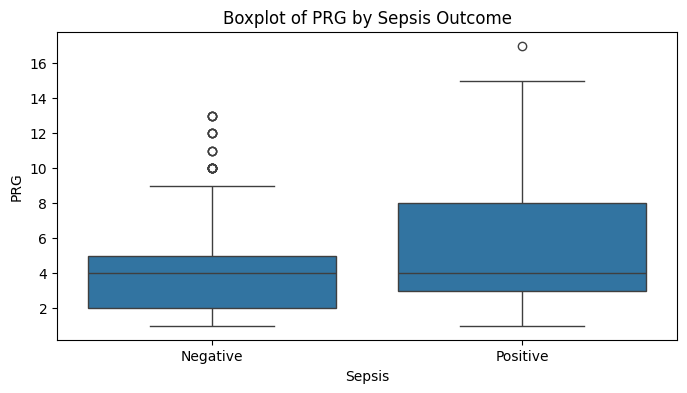

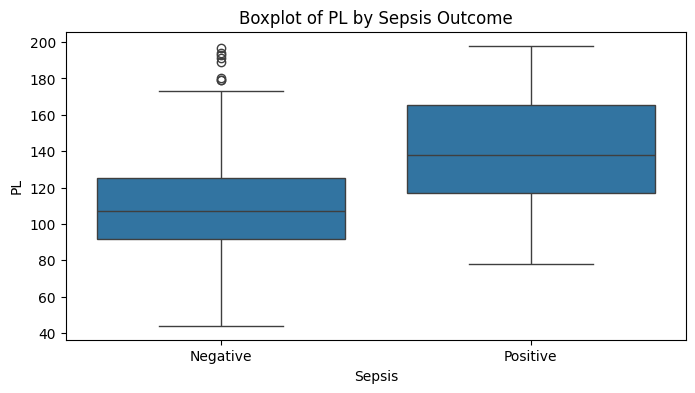

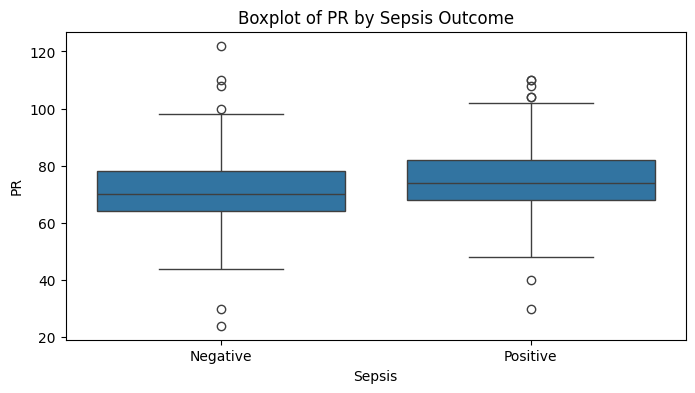

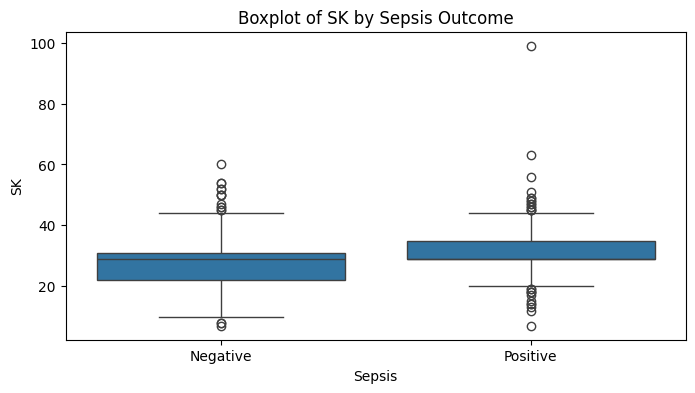

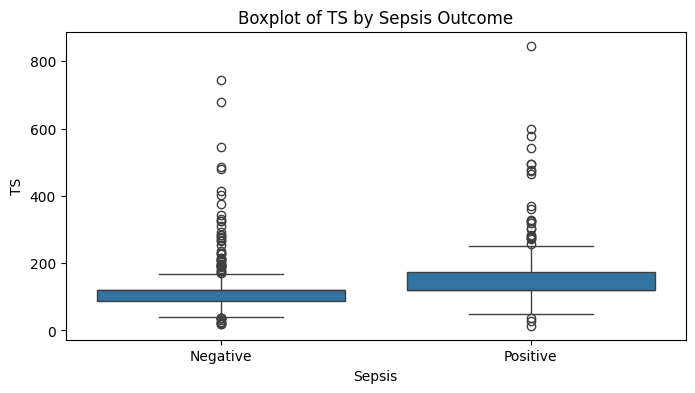

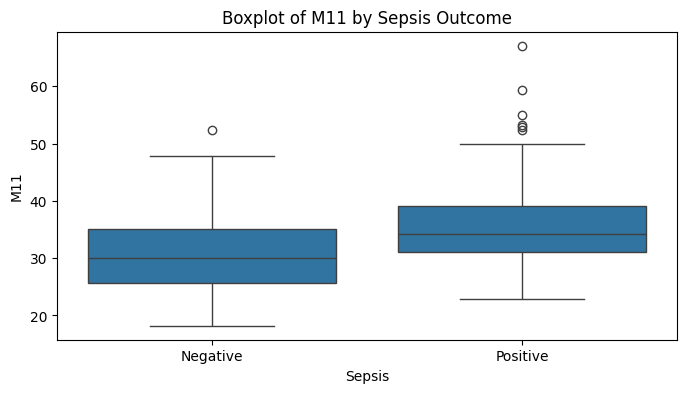

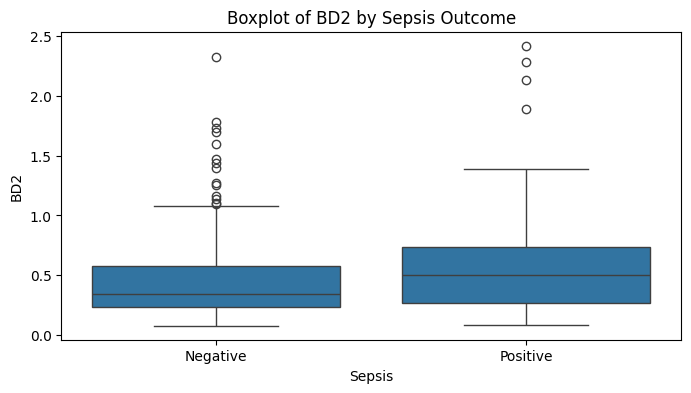

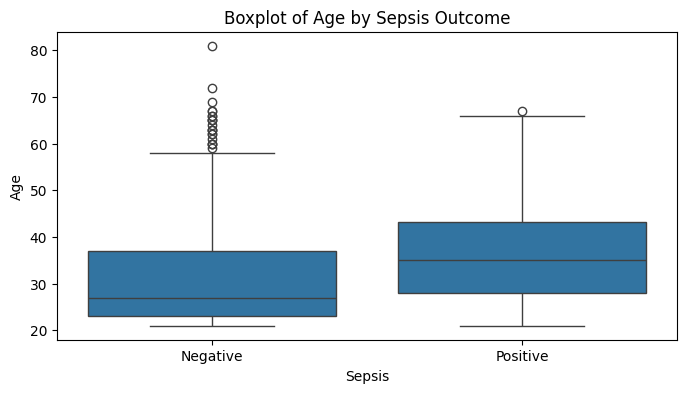

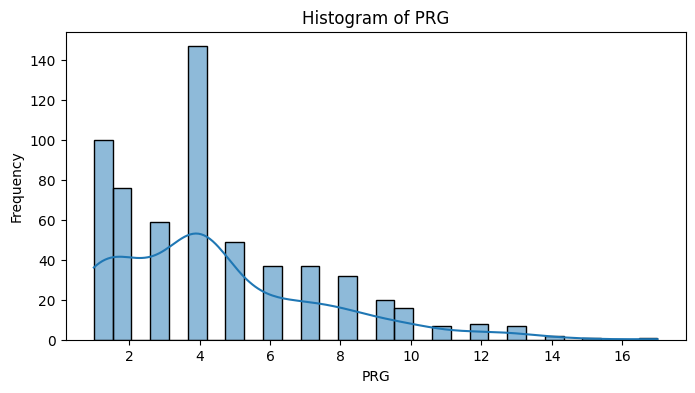

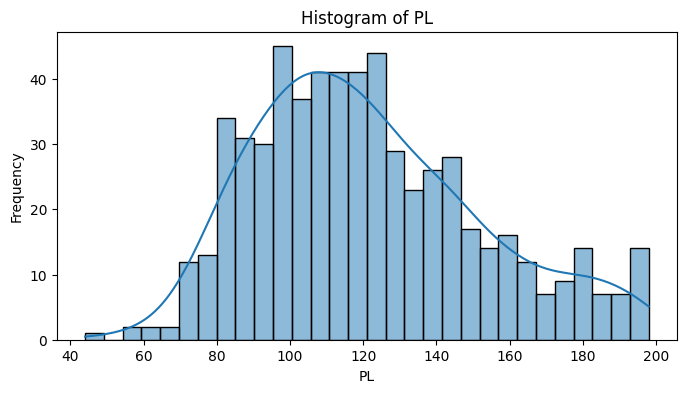

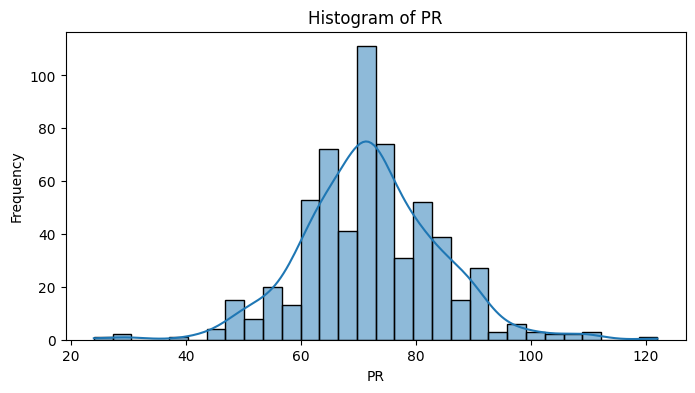

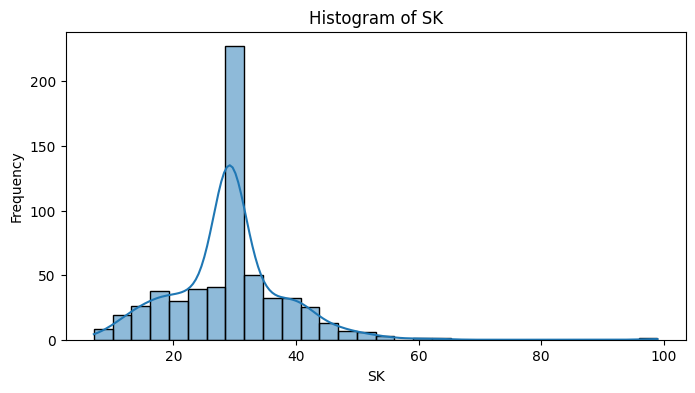

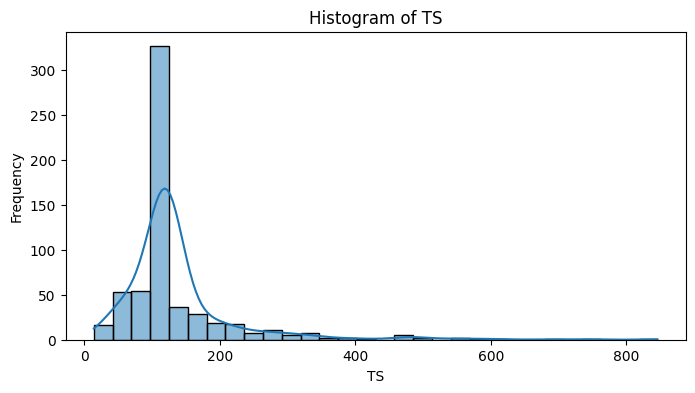

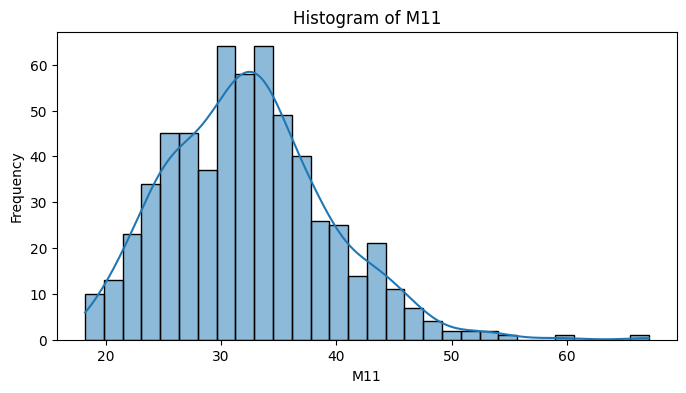

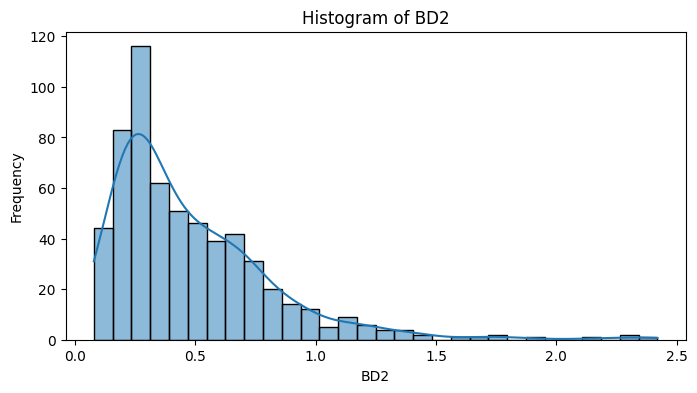

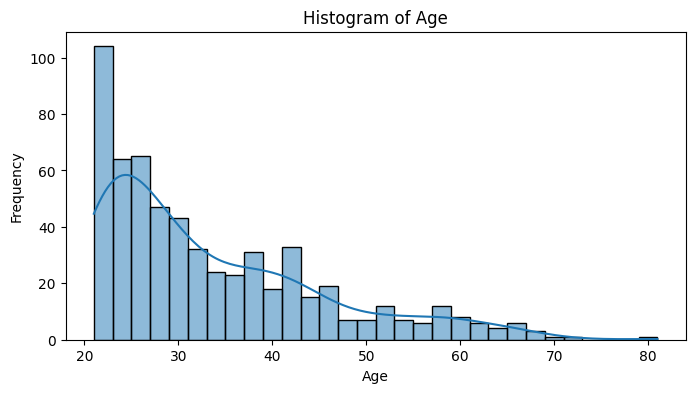

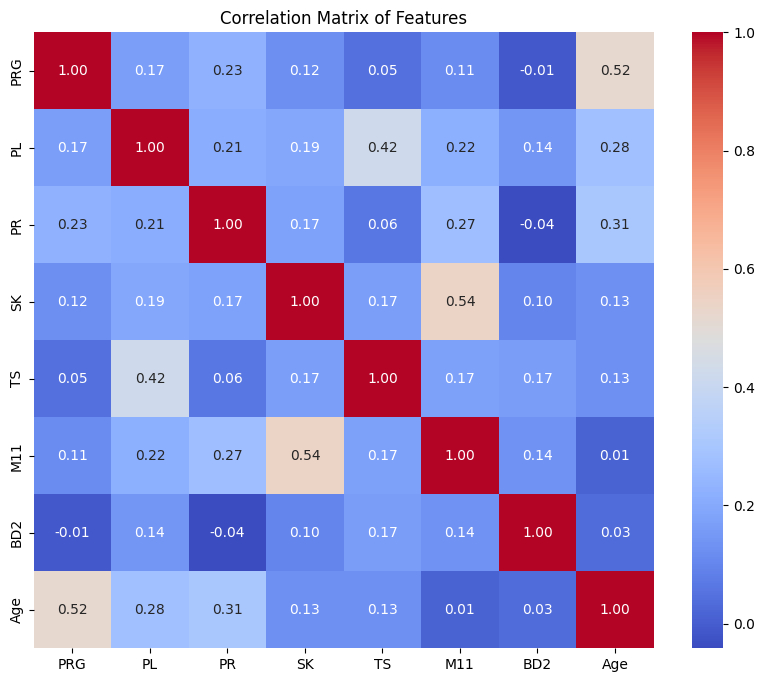

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'df' with your cleaned data.
# List of continuous features
features = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']
target = 'Sepssis'

# Ensure the target is categorical if it isn't already
df[target] = df[target].astype('category')

# Define the output PDF filename
pdf_filename = 'eda_results.pdf'

# 1. Grouped Boxplots for each feature by Sepsis outcome
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=target, y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Sepsis Outcome')
    plt.xlabel('Sepsis')
    plt.ylabel(feature)
    plt.show()

# 2. Histograms with KDE for each feature to inspect distribution
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# 3. Correlation Heatmap of continuous features
corr_matrix = df[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Assuming your cleaned data is in a DataFrame called 'df'
# List of continuous features and the target column
features = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']
target = 'Sepssis'

# Ensure the target is categorical if it isn't already
df[target] = df[target].astype('category')



# Create a PdfPages object to save all the plots into one PDF
with PdfPages(pdf_filename) as pdf:
    
    # 1. Grouped Boxplots for each feature by Sepsis outcome
    for feature in features:
        fig, ax = plt.subplots(figsize=(8, 4))
        sns.boxplot(x=target, y=feature, data=df, ax=ax)
        ax.set_title(f'Boxplot of {feature} by Sepsis Outcome')
        ax.set_xlabel('Sepsis')
        ax.set_ylabel(feature)
        pdf.savefig(fig)  # Save the current figure into the PDF
        plt.close(fig)    # Close the figure to free memory

    # 2. Histograms with KDE for each feature to inspect distribution
    for feature in features:
        fig, ax = plt.subplots(figsize=(8, 4))
        sns.histplot(df[feature], kde=True, bins=30, ax=ax)
        ax.set_title(f'Histogram of {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')
        pdf.savefig(fig)
        plt.close(fig)
    
    # 3. Correlation Heatmap of continuous features
    corr_matrix = df[features].corr()
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
    ax.set_title('Correlation Matrix of Features')
    pdf.savefig(fig)
    plt.close(fig)

print(f"All plots have been saved into {pdf_filename}")


All plots have been saved into eda_results.pdf


In [69]:
df

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6.0,148.0,72.0,35.0,120.0,33.6,0.627,50,0,Positive
1,ICU200011,1.0,85.0,66.0,29.0,120.0,26.6,0.351,31,0,Negative
2,ICU200012,8.0,183.0,64.0,29.0,120.0,23.3,0.672,32,1,Positive
3,ICU200013,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,1,Negative
4,ICU200014,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6.0,123.0,72.0,45.0,230.0,33.6,0.733,34,0,Negative
595,ICU200605,4.0,188.0,82.0,14.0,185.0,32.0,0.682,22,1,Positive
596,ICU200606,4.0,67.0,76.0,29.0,120.0,45.3,0.194,46,1,Negative
597,ICU200607,1.0,89.0,24.0,19.0,25.0,27.8,0.559,21,0,Negative


# Hypothesis testing

In [71]:
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu

# List of continuous features and the target column
features = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']
target = 'Sepssis'

# Convert target to binary (0 for Negative, 1 for Positive)
df[target] = df[target].map({'Negative': 0, 'Positive': 1})

# Function to decide on the test based on skewness
def choose_test(series):
    # If skewness is small, assume approximate normality
    return abs(series.skew()) < 0.5

results = []
df

for feature in features:
    group0 = df[df[target] == 0][feature]
    group1 = df[df[target] == 1][feature]
    
    if choose_test(group0) and choose_test(group1):
        # Use t-test for approximately normal data
        test_stat, p_value = ttest_ind(group0, group1, nan_policy='omit')
        test_used = 't-test'
    else:
        # Use Mann-Whitney U for non-normal data
        test_stat, p_value = mannwhitneyu(group0, group1, alternative='two-sided')
        test_used = 'Mann-Whitney U'
    
    results.append({
        'Feature': feature,
        'Test': test_used,
        'Statistic': test_stat,
        'p-value': p_value
    })

results_df = pd.DataFrame(results)
print(results_df)


  Feature            Test     Statistic       p-value
0     PRG  Mann-Whitney U  29045.500000  5.517151e-09
1      PL  Mann-Whitney U  17463.500000  1.233922e-30
2      PR          t-test     -4.182297  3.318872e-05
3      SK  Mann-Whitney U  30292.500000  1.737963e-07
4      TS  Mann-Whitney U  26883.500000  3.404875e-13
5     M11  Mann-Whitney U  24763.000000  3.134672e-15
6     BD2  Mann-Whitney U  31589.500000  6.800959e-06
7     Age  Mann-Whitney U  26491.500000  1.971962e-12


# Feature Scaling

In [73]:
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer(method='yeo-johnson')

for i in ["SK","TS","M11","BD2","Age"]:
    df[i] = transformer.fit_transform(df[[i]])
    

In [74]:
df=df.drop(columns=["ID"])

In [75]:
df.columns

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

In [76]:
from sklearn.preprocessing import RobustScaler
# Initialize the scaler
scaler = RobustScaler()
X=df.drop(columns=["Sepssis"])
Y=df["Sepssis"]
# Apply Robust Scaling (only on numeric columns)
df_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
print(df_scaled)
X
X

      PRG        PL     PR        SK         TS       M11       BD2       Age  \
0    0.50  0.768293  0.000  0.818876   0.000000  0.169826  0.525864  0.853995   
1   -0.75 -0.768293 -0.375  0.000000   0.000000 -0.637210 -0.092184  0.133688   
2    1.00  1.621951 -0.500  0.000000   0.000000 -1.087712  0.597409  0.194025   
3   -0.75 -0.670732 -0.375 -0.888094  -3.434720 -0.449105 -0.787872 -0.800685   
4    0.00  0.500000 -2.000  0.818876   4.708344  1.046598  1.501376  0.250558   
..    ...       ...    ...       ...        ...       ...       ...       ...   
594  0.50  0.158537  0.000  2.070291   9.075598  0.169826  0.685182  0.303629   
595  0.00  1.743902  0.625 -2.412634   6.051531  0.000000  0.612492 -0.667710   
596  0.00 -1.207317  0.250  0.000000   0.000000  1.223866 -0.664146  0.753925   
597 -0.75 -0.670732 -3.000 -1.530771 -22.204512 -0.485978  0.405072 -0.800685   
598 -0.75  1.378049  0.125  0.000000   0.000000  0.488225 -1.207538  0.486852   

     Insurance  
0         

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,6.0,148.0,72.0,0.697514,0.006889,0.268762,0.785841,1.361934,0
1,1.0,85.0,66.0,0.057292,0.006889,-0.820636,-0.208017,0.122246,0
2,8.0,183.0,64.0,0.057292,0.006889,-1.428757,0.900890,0.226089,1
3,1.0,89.0,66.0,-0.637047,-0.477789,-0.566717,-1.326724,-1.485860,1
4,4.0,137.0,40.0,0.697514,0.671290,1.452294,2.354520,0.323386,1
...,...,...,...,...,...,...,...,...,...
594,6.0,123.0,72.0,1.675909,1.287559,0.268762,1.042034,0.414724,0
595,4.0,188.0,82.0,-1.828979,0.860829,0.039518,0.925143,-1.257002,1
596,4.0,67.0,76.0,0.057292,0.006889,1.691583,-1.127765,1.189708,1
597,1.0,89.0,24.0,-1.139512,-3.126420,-0.616492,0.591601,-1.485860,0


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df_scaled, Y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.7333
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        77
           1       0.64      0.58      0.61        43

    accuracy                           0.73       120
   macro avg       0.71      0.70      0.70       120
weighted avg       0.73      0.73      0.73       120


Random Forest Accuracy: 0.7333
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        77
           1       0.61      0.70      0.65        43

    accuracy                           0.73       120
   macro avg       0.71      0.73      0.72       120
weighted avg       0.74      0.73      0.74       120


SVM Accuracy: 0.7500
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        77
           1       0.68      0.58      0.62        43

    accuracy                           0.75       120
   macro avg       0.73      0.71   

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df_scaled, Y, test_size=0.2, random_state=42)

# Base models
base_models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC(probability=True))  # Needed for stacking
]

# Meta-model (can be another classifier like Logistic Regression or another ensemble method)
meta_model = LogisticRegression()

# Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Predictions
y_pred = stacking_model.predict(X_test)

# Evaluation
print(f"\nStacking Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


Stacking Model Accuracy: 0.7333
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        77
           1       0.63      0.63      0.63        43

    accuracy                           0.73       120
   macro avg       0.71      0.71      0.71       120
weighted avg       0.73      0.73      0.73       120



In [79]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Bidirectional

# Ensure categorical data is properly encoded
Y=Y.astype('int')

X_numeric = df_scaled.apply(pd.to_numeric, errors='coerce')
X_train, X_test, y_train, y_test = train_test_split(X_numeric, Y, test_size=0.2, random_state=42)


# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
print("\nGradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print(classification_report(y_test, gb_pred))

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("\nXGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
print("\nKNN Accuracy:", accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

# SGM (Simple Neural Network)
sgm_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
sgm_model.fit(X_train, y_train)
sgm_pred = sgm_model.predict(X_test)
print("\nSGM Accuracy:", accuracy_score(y_test, sgm_pred))
print(classification_report(y_test, sgm_pred))

# Bi-SGM (Deeper Neural Network)
bi_sgm_model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500)
bi_sgm_model.fit(X_train, y_train)
bi_sgm_pred = bi_sgm_model.predict(X_test)
print("\nBi-SGM Accuracy:", accuracy_score(y_test, bi_sgm_pred))
print(classification_report(y_test, bi_sgm_pred))

# Reshape input for RNN models
X_train_rnn = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

# RNN Model
rnn_model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(1, activation='sigmoid')
])
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.fit(X_train_rnn, y_train, epochs=10, verbose=0)
rnn_pred = (rnn_model.predict(X_test_rnn) > 0.5).astype(int)
print("\nRNN Accuracy:", accuracy_score(y_test, rnn_pred))
print(classification_report(y_test, rnn_pred))

# Bi-RNN Model
bi_rnn_model = Sequential([
    Bidirectional(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], 1))),
    Dense(1, activation='sigmoid')
])
bi_rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
bi_rnn_model.fit(X_train_rnn, y_train, epochs=10, verbose=0)
bi_rnn_pred = (bi_rnn_model.predict(X_test_rnn) > 0.5).astype(int)
print("\nBi-RNN Accuracy:", accuracy_score(y_test, bi_rnn_pred))
print(classification_report(y_test, bi_rnn_pred))



Gradient Boosting Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        77
           1       0.64      0.70      0.67        43

    accuracy                           0.75       120
   macro avg       0.73      0.74      0.73       120
weighted avg       0.76      0.75      0.75       120



C:\Users\dines\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [20:49:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 0.6916666666666667
              precision    recall  f1-score   support

           0       0.77      0.74      0.75        77
           1       0.57      0.60      0.58        43

    accuracy                           0.69       120
   macro avg       0.67      0.67      0.67       120
weighted avg       0.70      0.69      0.69       120


KNN Accuracy: 0.6916666666666667
              precision    recall  f1-score   support

           0       0.74      0.79      0.77        77
           1       0.58      0.51      0.54        43

    accuracy                           0.69       120
   macro avg       0.66      0.65      0.66       120
weighted avg       0.68      0.69      0.69       120



C:\Users\dines\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



SGM Accuracy: 0.725
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        77
           1       0.61      0.65      0.63        43

    accuracy                           0.72       120
   macro avg       0.70      0.71      0.71       120
weighted avg       0.73      0.72      0.73       120



C:\Users\dines\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



Bi-SGM Accuracy: 0.7166666666666667
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        77
           1       0.60      0.65      0.62        43

    accuracy                           0.72       120
   macro avg       0.70      0.70      0.70       120
weighted avg       0.72      0.72      0.72       120



C:\Users\dines\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

RNN Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        77
           1       0.57      0.65      0.61        43

    accuracy                           0.70       120
   macro avg       0.68      0.69      0.68       120
weighted avg       0.71      0.70      0.70       120



C:\Users\dines\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step

Bi-RNN Accuracy: 0.725
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        77
           1       0.61      0.65      0.63        43

    accuracy                           0.72       120
   macro avg       0.70      0.71      0.71       120
weighted avg       0.73      0.72      0.73       120



In [80]:
df.dtypes

PRG           float64
PL            float64
PR            float64
SK            float64
TS            float64
M11           float64
BD2           float64
Age           float64
Insurance       int64
Sepssis      category
dtype: object

In [81]:
import optuna
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Convert categorical columns to numeric
X_numeric = pd.get_dummies(df_scaled).apply(pd.to_numeric, errors='coerce').fillna(0)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_numeric, Y, test_size=0.2, random_state=42)

# Define Optuna optimization function
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "use_label_encoder": False,
        "eval_metric": "logloss",
    }
    
    # Train XGBoost model
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    return accuracy_score(y_test, preds)

# Run Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)  # Run 30 trials

# Get best parameters
best_params = study.best_params
print("\nBest Parameters:", best_params)

# Train final model with best parameters
best_xgb = XGBClassifier(**best_params)
best_xgb.fit(X_train, y_train)
best_preds = best_xgb.predict(X_test)

# Evaluate model
print("\nOptimized XGBoost Accuracy:", accuracy_score(y_test, best_preds))
print(classification_report(y_test, best_preds))


[I 2025-04-04 20:49:44,686] A new study created in memory with name: no-name-984f5562-56e3-45b4-b26e-515f58f2ca10
C:\Users\dines\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [20:49:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-04-04 20:49:45,148] Trial 0 finished with value: 0.7 and parameters: {'n_estimators': 145, 'max_depth': 9, 'learning_rate': 0.11967354812790264, 'subsample': 0.7679180240427415, 'colsample_bytree': 0.7523556002853691}. Best is trial 0 with value: 0.7.
C:\Users\dines\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [20:49:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } 


Best Parameters: {'n_estimators': 248, 'max_depth': 6, 'learning_rate': 0.11671800969843267, 'subsample': 0.502541009970991, 'colsample_bytree': 0.8103425580593607}

Optimized XGBoost Accuracy: 0.7583333333333333
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        77
           1       0.65      0.72      0.68        43

    accuracy                           0.76       120
   macro avg       0.74      0.75      0.74       120
weighted avg       0.77      0.76      0.76       120

